In [1]:
import pandas as pd 

In [2]:
import numpy as np
import matplotlib as plt
%matplotlib inline



In [4]:
df = pd.read_csv('train.csv') #Reading the dataset in a dataframe using Pandas

In [5]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

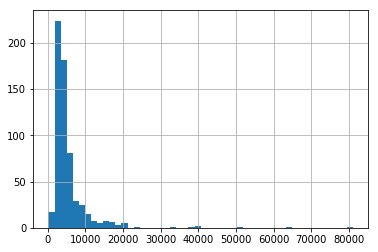

In [8]:
df['ApplicantIncome'].hist(bins=50)

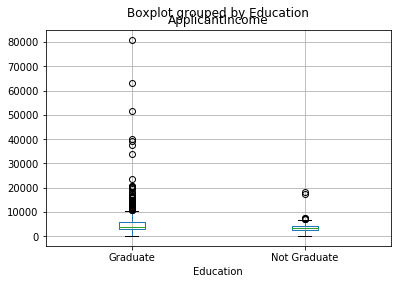

In [12]:
# Boxplot analysis

df.boxplot(column='ApplicantIncome', by = 'Education')

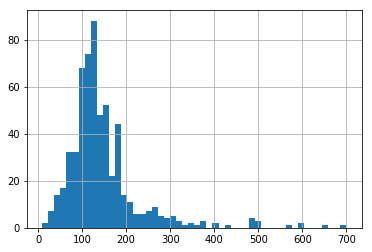

In [13]:
df['LoanAmount'].hist(bins=50)

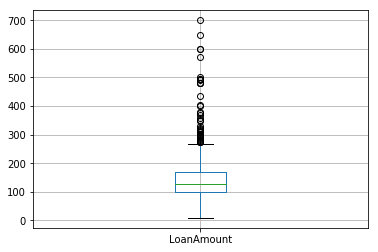

In [14]:
df.boxplot(column='LoanAmount')

In [15]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())

print('Frequency Table for Credit History:')

print(temp1)

print('\nProbability of getting loan for each Credit History class:')

print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [16]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Applicants by Credit_History')

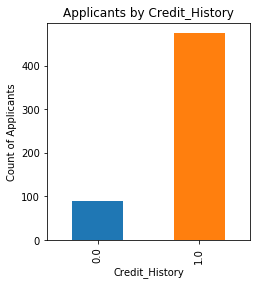

In [29]:
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(121)
temp1.plot(kind= 'bar')
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')

ax1.set_title('Applicants by Credit_History')




Text(0.5, 1.0, 'Probability of getting loan by credit history')

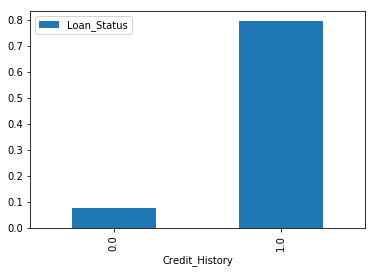

In [30]:

ax2 = fig.add_subplot(122)
temp2.plot(kind= 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

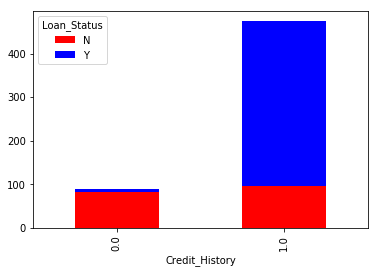

In [53]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)

In [54]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [55]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

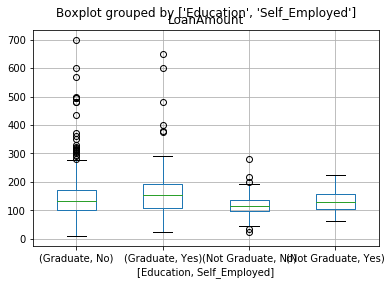

In [64]:
df.boxplot(column='LoanAmount', by=['Education', 'Self_Employed'])

In [65]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [66]:
df['Self_Employed'].fillna('No', inplace=True)

In [70]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', aggfunc=np.median)

#Define function to return value of tis pivot_table

def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]



In [76]:
# This provides another method of imputing missing values of loan amount


# df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage,axis=1), inplace=True)

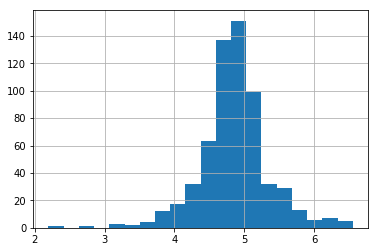

In [77]:
#Treating Extreme values in distribution of Loan Amount and Applicant Income

df['LoanAmount_log'] = np.log(df['LoanAmount'])

df['LoanAmount_log'].hist(bins=20)

In [80]:
#Filling missing values for categorical variables

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

df['Married'].fillna(df['Married'].mode()[0], inplace=True)

df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [81]:
#Encoding categorical variables to numerics

from sklearn.preprocessing import LabelEncoder

var_mod = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

le =LabelEncoder()

In [82]:
for i in var_mod:
    df[i] = le.fit_transform(df[i])
    
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
dtype: object

In [115]:
#Importing the required modules for machine learning classification
#importing scikit learn module:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold # For K-Fold Cross-Validation

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn import metrics

In [135]:
# Generic function for making a classification model and accessing performance:

def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors], data[outcome])
    
    #Make predictions on training set:
    
    predictions = model.predict(data[predictors])
    
    #Print accuracy
    
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    
    print("Accuracy: %s" % "{0:.3%}".format(accuracy))
    
    
  
    
   
    
    i = 1
    
    kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    
    for train, test in kf.split(data[predictors],data[outcome]):
        
        #Filter training/test data
        train_predictors = data[predictors].loc[train]
        test_predictors = data[predictors].loc[test]
        
        
        #The target we're using to train the algorithm.
        
        train_target = data[outcome][train]
        test_target = data[outcome][test]
        
        
        #Training the algorithm using the predictors and target.
       
        model.fit(train_predictors, train_target)
        pred_test = model.predict(test_predictors)
        
        score = metrics.accuracy_score(test_target, pred_test)
        
        print('accuracy_score', score)
        
        i+=1
        
        
       
        

In [139]:
model = LogisticRegression()
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy: 80.945%
accuracy_score 0.7983870967741935
accuracy_score 0.8306451612903226
accuracy_score 0.8032786885245902
accuracy_score 0.7868852459016393
accuracy_score 0.8278688524590164


C:\Users\Victor Oko\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Victor Oko\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Victor Oko\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Victor Oko\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Victor Oko\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

In [138]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy: 80.945%
accuracy_score 0.7983870967741935
accuracy_score 0.8306451612903226
accuracy_score 0.8032786885245902
accuracy_score 0.7868852459016393
accuracy_score 0.8278688524590164
